<a href="https://colab.research.google.com/github/parismita0528/18cse086_dmdw/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs 

In [ ]:
url="https://raw.githubusercontent.com/parismita0528/18cse086_dmdw/main/student-mat.csv"
df=pd.read_csv(url)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


***Dissimilarity Matrix For Binary Attributes***

In [ ]:
dfs=df[['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']]
dfs.head()

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,yes,no,no,no,yes,yes,no,no
1,no,yes,no,no,no,yes,yes,no
2,yes,no,yes,no,yes,yes,yes,no
3,no,yes,yes,yes,yes,yes,yes,yes
4,no,yes,yes,no,yes,yes,no,no


In [ ]:
dfs=dfs.replace('no',0)
dfs=dfs.replace('yes',1)
dfs.head()

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,1,0,0,0,1,1,0,0
1,0,1,0,0,0,1,1,0
2,1,0,1,0,1,1,1,0
3,0,1,1,1,1,1,1,1
4,0,1,1,0,1,1,0,0


In [ ]:
n=np.array(dfs[['schoolsup','famsup']])
n=n.reshape(-1,2)
n.shape

(395, 2)

In [ ]:
m=np.array(dfs[['romantic','internet']])
m=m.reshape(-1,2)
m.shape

(395, 2)

In [ ]:
from scipy.spatial import distance

In [ ]:
dist_matrix=distance.cdist(n,m)
dist_matrix.shape

(395, 395)

In [ ]:
print(dist_matrix)

[[1.         1.41421356 1.41421356 ... 1.         1.41421356 1.41421356]
 [1.         0.         0.         ... 1.         0.         0.        ]
 [1.         1.41421356 1.41421356 ... 1.         1.41421356 1.41421356]
 ...
 [0.         1.         1.         ... 0.         1.         1.        ]
 [0.         1.         1.         ... 0.         1.         1.        ]
 [0.         1.         1.         ... 0.         1.         1.        ]]


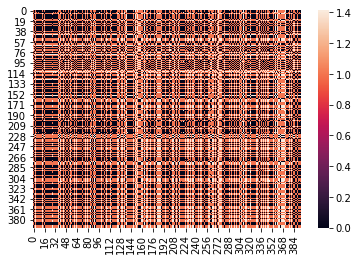

In [ ]:
sbs.heatmap(dist_matrix)
plt.show()

***Dissimilarity Matrix For Numerical Attributes***

In [ ]:
numerical=df[['age','Medu','Fedu','traveltime','studytime','failures']]
numerical.head()

,age,Medu,Fedu,traveltime,studytime,failures
0,18,4,4,2,2,0
1,17,1,1,1,2,0
2,15,1,1,1,2,3
3,15,4,2,1,3,0
4,16,3,3,1,2,0


In [ ]:
num1=np.array(numerical[['age','failures']])
num1.reshape(-1,2)
num1.shape

(395, 2)

In [ ]:
num2=np.array(numerical[['Fedu','Medu']])
num2.reshape(-1,2)
num2.shape

(395, 2)

In [ ]:
dist_matrix1=distance.cdist(num1,num2)
print(dist_matrix1)

[[14.56021978 17.02938637 17.02938637 ... 17.02938637 16.2788206
  17.02938637]
 [13.60147051 16.03121954 16.03121954 ... 16.03121954 15.29705854
  16.03121954]
 [11.04536102 14.14213562 14.14213562 ... 14.14213562 13.
  14.14213562]
 ...
 [17.02938637 20.09975124 20.09975124 ... 20.09975124 19.
  20.09975124]
 [14.56021978 17.02938637 17.02938637 ... 17.02938637 16.2788206
  17.02938637]
 [15.5241747  18.02775638 18.02775638 ... 18.02775638 17.2626765
  18.02775638]]


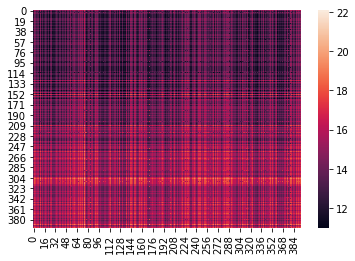

In [ ]:
sbs.heatmap(dist_matrix1)
plt.show()

***Dissimilarity Matrix For Nominal Attributes***

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
nominal=df[['Mjob','Fjob','reason','guardian']]
nominal.head()

,Mjob,Fjob,reason,guardian
0,at_home,teacher,course,mother
1,at_home,other,course,father
2,at_home,other,other,mother
3,health,services,home,mother
4,other,other,home,father


In [ ]:
nominal=nominal.replace('at_home','home')
nominal.head()

,Mjob,Fjob,reason,guardian
0,home,teacher,course,mother
1,home,other,course,father
2,home,other,other,mother
3,health,services,home,mother
4,other,other,home,father


In [ ]:
nominal=nominal.astype('category')

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [ ]:
nominal['guardian']=lb.fit_transform(nominal['guardian'])
nominal['Mjob']=lb.fit_transform(nominal['Mjob'])
nominal['Fjob']=lb.fit_transform(nominal['Fjob'])
nominal['reason']=lb.fit_transform(nominal['reason'])

In [ ]:
nominal.head()

,Mjob,Fjob,reason,guardian
0,1,4,0,1
1,1,2,0,0
2,1,2,2,1
3,0,3,1,1
4,2,2,1,0


In [ ]:
num1=np.array(nominal[['Mjob','Fjob']])
num1.reshape(-1,2)
num1.shape

(395, 2)

In [ ]:
num2=np.array(nominal[['reason','guardian']])
num2.reshape(-1,2)
num2.shape

(395, 2)

In [ ]:
dist_matrix2=distance.cdist(num1,num2)
print(dist_matrix2)

[[3.16227766 4.12310563 3.16227766 ... 2.23606798 3.16227766 4.12310563]
 [1.41421356 2.23606798 1.41421356 ... 1.         1.41421356 2.23606798]
 [1.41421356 2.23606798 1.41421356 ... 1.         1.41421356 2.23606798]
 ...
 [2.23606798 2.82842712 1.         ... 2.         2.23606798 2.82842712]
 [3.16227766 3.60555128 1.41421356 ... 3.         3.16227766 3.60555128]
 [2.         2.23606798 0.         ... 2.23606798 2.         2.23606798]]


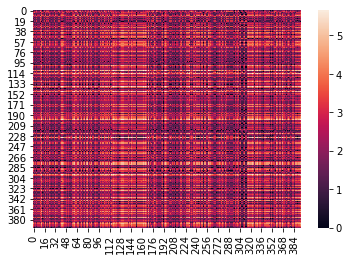

In [ ]:
sbs.heatmap(dist_matrix2)
plt.show()